In [ ]:
%%shell
jupyter nbconvert --to html /content/Informe_Hito_3_Grupo_23.ipynb

[NbConvertApp] Converting notebook /content/Informe_Hito_3_Grupo_23.ipynb to html
[NbConvertApp] Writing 1902622 bytes to /content/Informe_Hito_3_Grupo_23.html


#Informe Hito 3 Grupo 23
## Integrantes:

### Sección 1:

Franco Navarro

Diego Vergara

### Sección 2:

Sivert Escaff

Daniel Avila

Branko Chameng

Lya Diaz








# Introduccion



## Motivacion *(Hecho por Franco, revision por Danilo)*

¿Cuál es el contexto general del tema/problema/datos de
estudio?¿Por qué podría ser interesante estudiar estos datos?

Es cada vez más frecuente que las personas prefieran el uso de tarjetas de pago, incluyendo tarjetas de crédito, en lugar de efectivo, como era común anteriormente. Con el incremento en la adopción de este método de pago, también ha surgido un aumento en el número de estafadores que buscan obtener beneficios a costa de las vulnerabilidades del sistema.

En la sociedad contemporánea, las estafas relacionadas con tarjetas de crédito han experimentado un notable aumento, constituyendo un problema que afecta a un gran número de personas en su vida cotidiana. Esto resalta la importancia de analizar este dataset, con el objetivo de identificar las características que incrementan la probabilidad de ser víctima de este tipo de delitos. Este análisis busca no solo predecir en qué circunstancias ocurren estas estafas, sino también desarrollar estrategias para reducir su frecuencia y, por ende, mitigar su impacto en la sociedad.


# Exploracion de Datos *(Hecho por Diego)*

A continuación, se procede con un análisis exploratorio de los datos, como un acercamiento inicial de los datos del dataset que podrían ser relevantes para el estudio y relaciones extraíbles con técnicas estadísticas exploratorias.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import numpy as np

pio.renderers.default = 'notebook'
test = pd.read_csv("fraud test.csv", sep= ",",on_bad_lines='skip')
pd.set_option('display.max_columns', None)
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209.0,33.9659,-80.9355,333497.0,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002.0,40.3207,-110.4360,302.0,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710.0,40.6729,-73.5365,34496.0,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780.0,28.5697,-80.8191,54767.0,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632.0,44.2529,-85.0170,1126.0,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320667,320667,21/10/2020 00:22,3.023500e+13,"fraud_Greenholt, Jacobi and Gleason",gas_transport,66.66,Matthew,Lambert,M,7188 Melissa Crest Apt. 151,New Holstein,WI,53061.0,43.9446,-88.0911,5196.0,Child psychotherapist,22/01/1978,fd0b1688280c2ee9cfb257598e994abe,1.382315e+09,43.389722,-88.660468,0.0
320668,320668,21/10/2020 00:23,4.746000e+12,fraud_Wiegand-Lowe,grocery_net,11.57,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,IN,46346.0,41.4802,-86.6919,1423.0,"Psychologist, forensic",07/10/1998,91bf7f5220147dd9db1296226379c898,1.382315e+09,40.893535,-85.808748,0.0
320669,320669,21/10/2020 00:24,3.723820e+14,fraud_Rutherford-Mertz,grocery_pos,134.55,Brent,Terrell,M,502 Rice Plaza Apt. 979,Port Ewen,NY,12466.0,41.8948,-73.9767,2471.0,Heritage manager,21/01/1966,f2178f3853a509f705b4b6642060333b,1.382315e+09,41.508074,-73.205238,0.0
320670,320670,21/10/2020 00:27,3.599240e+15,fraud_Harber Inc,gas_transport,67.74,Jessica,Smith,F,06808 Ryan Valleys,Dubre,KY,42731.0,36.8421,-85.5396,341.0,Insurance risk surveyor,19/11/1932,a3490c5deb4102a26337f5f4b63d76a9,1.382315e+09,36.124179,-85.419007,0.0


**- Análisis de distancia** *(Hecho por Branko, revision por Diego)*

Se calcula la distancia entre el usuario y el comerciante. El primer gráfico son las distancias para todas las tuplas del dataset, y el segundo es únicamente para los casos fraudulentos.

Al comparar las curvas, es notable que estas son idénticas. Se desprende de esto que no existe relación entre la distancia entre el usuario y el comerciante, y si una transacción es fraudulenta o no.


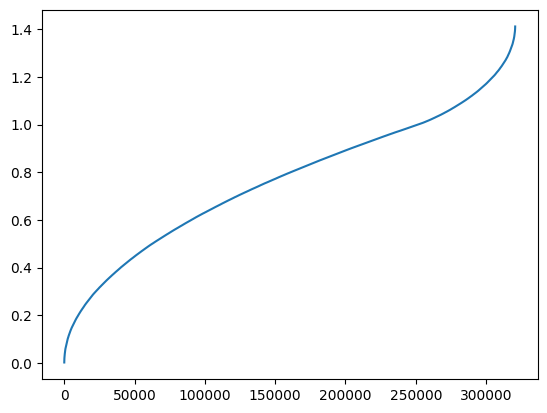

In [ ]:
import numpy as np
test2 = np.sqrt((test["lat"]-test["merch_lat"])**2 + (test["long"]-test["merch_long"])**2)
test2 = test2.sort_values(ascending=True, ignore_index=True)
plt.plot(test2)
plt.show()

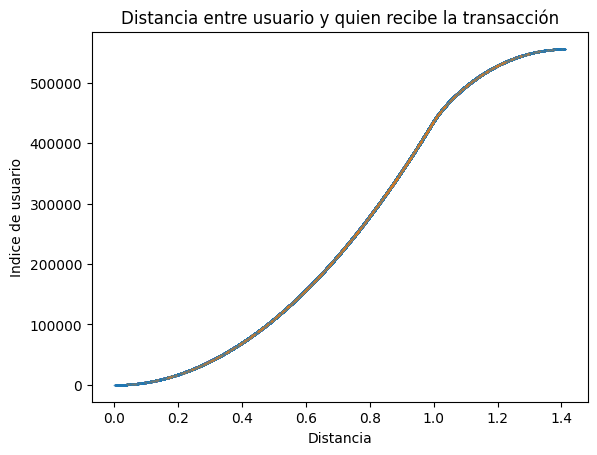

In [ ]:
test3 = np.sqrt((test["lat"]-test["merch_lat"])**2 + (test["long"]-test["merch_long"])**2)
extractIsFraud = test["is_fraud"]
test4 = pd.concat([test3.rename("distance"), extractIsFraud],axis=1)
test4 = test4.sort_values(by=["distance"], ascending=True, ignore_index=True)
plt.scatter(test4["distance"], test4.index, s=0.01)
test4['distanceFraud'] = test4['distance'].where(test4['is_fraud'] == 1, other=None)
plt.scatter(test4['distanceFraud'], test4.index, s=0.01)
plt.savefig('filename.png', dpi=1000, bbox_inches='tight')
plt.title('Distancia entre usuario y quien recibe la transacción')
plt.xlabel('Distancia')
plt.ylabel('Indice de usuario')
plt.show()

#La imagen muestra en azul todo el data set de forma ordenada, y el naranjo es el mismo dataset filtrado por si es fraude o no
#Claramente no podemos concluir que la distancia tiene relacion alguna respecto a si es fraude o no, lo unico notable es que no hay
#fraudes en un pequeño espacio donde la distancia es muy pequeña, quizas esa parte es investigable pero ademas de eso no hay informacion
#relevante relacionada a la distancia.


**- Trabajos con más incidencia en ser estafados** *(Hecho por Franco, revision por Diego)*

Se usan gráficos de barra para mostrar las 10 profesiones que sufren mayor cantidad de transacciones fraudulentas, en orden descendiente.

Es notable que las frecuencias de estafas son comparativamente bajas en proporción a las del dataset total. Esto debido a que esta columna es altamente específica. Para desprender más información de esto, sería prudente extraer otros datos, como edad promedio por profesión, antes de proponer relaciones entre este dato y la incidencia en estafa.

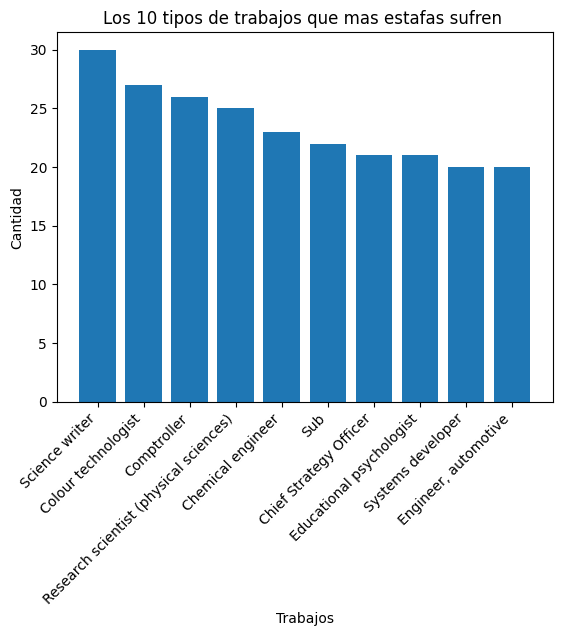

In [ ]:

solofraudes=test[(test['is_fraud']==1.0)]
conteo=solofraudes['job'].value_counts().reset_index()
conteo.columns=['Trabajo','Cantidad']
conteo=conteo.head(10)
plt.bar(conteo['Trabajo'],conteo['Cantidad'])
plt.xlabel('Trabajos')
plt.ylabel('Cantidad')
plt.title('Los 10 tipos de trabajos que mas estafas sufren ')
plt.xticks(rotation=45,ha='right')
plt.show()


**- Transacciones fradulentas por hora del día** *(Hecho por Franco, revision por Diego, análisis adicional por cantidad por Hugo)*

Se grafican las 7 horas con mayor frecuencia en transacciones fraudulentas.
Es inmediatamente notable que existen horar con mucha mayor frecuencia de transacciones fraudulentas, concentrándose en la noche.

Este sí es una pieza de información importante y válida a tener en consideración al considerar los datos relaciones con una mayor probabilidad de que una transacción sea fraudulenta.

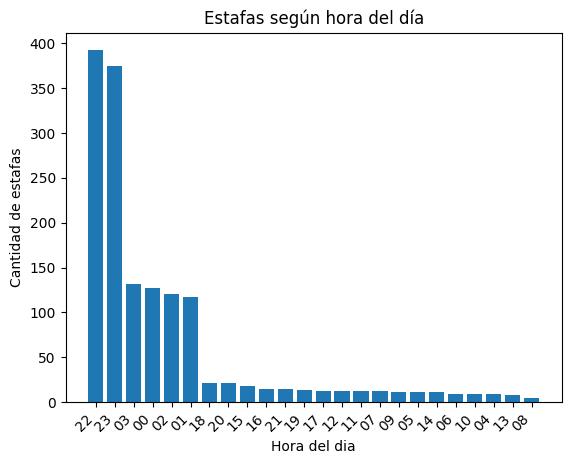

In [ ]:
solofraudes=test[(test['is_fraud']==1.0)]
tablahoras=solofraudes[solofraudes['trans_date_trans_time'].str.len()==16]
tablahoras['trans_date_trans_time']=tablahoras['trans_date_trans_time'].str.slice(11,13)
tablahoras.sort_values(by='trans_date_trans_time')
tablahoras=tablahoras['trans_date_trans_time'].value_counts().reset_index()
tablahoras.rename(columns={'count':'Cantidad','trans_date_trans_time':'Hora'},inplace=True)
tablahoras
plt.bar(tablahoras['Hora'],tablahoras['Cantidad'])
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de estafas')
plt.title('Estafas según hora del día')
plt.xticks(rotation=45,ha='right')
plt.show()


También es de interés visualizar las transacciones según hora para tener una idea de como se distribuyen y ser posible hacer una comparativa.

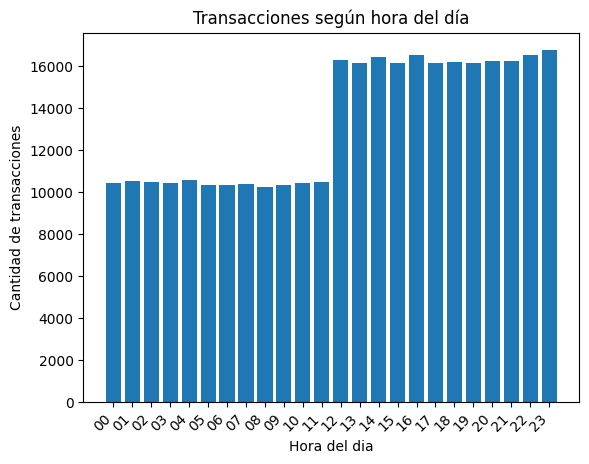

In [ ]:
testhdhorasgeneral=test
tabla2=testhdhorasgeneral[testhdhorasgeneral['trans_date_trans_time'].str.len()==16]
tabla2['trans_date_trans_time']=tabla2['trans_date_trans_time'].str.slice(11,13)
tabla2.sort_values(by='trans_date_trans_time')
tabla2=tabla2['trans_date_trans_time'].value_counts().reset_index()
tabla2.rename(columns={'count':'Cantidad','trans_date_trans_time':'Hora'},inplace=True)
tabla2=tabla2.sort_values(by='Hora')
tabla2
plt.bar(tabla2['Hora'],tabla2['Cantidad'])
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de transacciones')
plt.title('Transacciones según hora del día')
plt.xticks(rotation=45,ha='right')
plt.show()


**- Categorías de compra con mayor estafas** *(Hecho por Franco, revision por Diego)*

Nuevamente usamos gráficos de barra para presentar los tipos de compra que más se corresponden con transacciones fraudulentas.

Nuevamente, es posible trazar una curva muy pronunciada, indicando una gran concentración en ciertos tipos de de compras. En particular, las compras en Shopping y objetos comestibles para el hogar (grocery) presentan una muy alta frecuencia en estafas.

También es posible establecer una relación entre probabilidad de transacción fraudulenta y tipo de compra. Esto tiene sentido, ya que es mucho más conveniente para el estafador comprar algo rápido y de valor discreto, a diferencia de comprar, por ejemplo, un viaje, el cual usualmente conlleva una capa importante de validación del usuario y suele tener un costo importante.

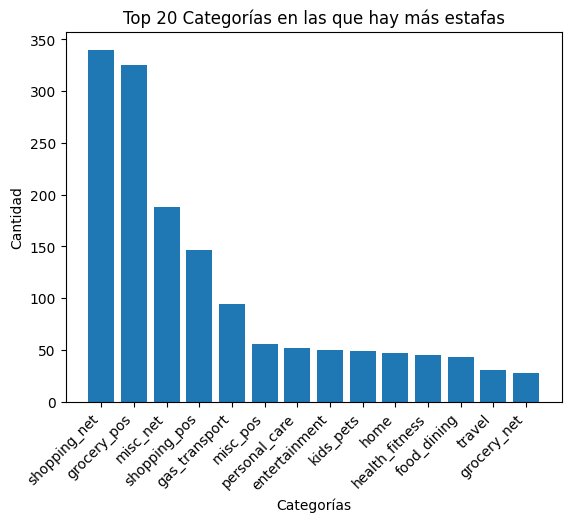

In [ ]:
sonFraudes=test[test['is_fraud']==1]
tabla=sonFraudes.groupby('category').size().reset_index()
tabla.columns=['Categorias','Cantidad']
tabla=tabla.sort_values('Cantidad',ascending=False)
plt.bar(tabla['Categorias'],tabla['Cantidad'])
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Top 20 Categorías en las que hay más estafas')
plt.xticks(rotation=45,ha='right')
plt.show()

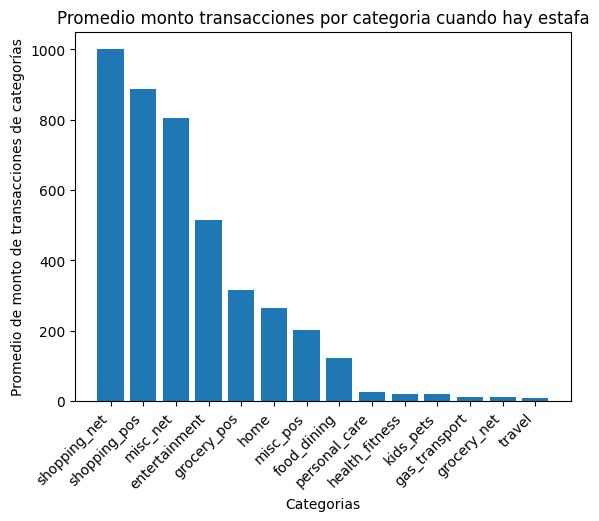

In [ ]:
sonFraudes=test[test['is_fraud']==1]
tabla1=sonFraudes.groupby('category').agg({'amt':'mean'}).reset_index()
tabla1.columns=['Categorias','Promedio']
tabla1=tabla1.sort_values('Promedio',ascending=False)
plt.bar(tabla1['Categorias'],tabla1['Promedio'])
plt.xlabel('Categorias')
plt.ylabel('Promedio de monto de transacciones de categorías')
plt.xticks(rotation=45,ha='right')
plt.title('Promedio monto transacciones por categoria cuando hay estafa')
plt.show()

En este caso, se quiso saber cuantas son las personas que han sido estafadas en este dataset. Se observo que la mejor manera para poder observar esto es un grafico de torta al ser demasiados los datos, ademas de que se obtiene la informacion de manera mas clara de esta manera.

De este grafico se pudo concluir de que es una cantidad minima la de personas estafadas, por lo que deben existir conjuntos de valores unicos que tengan en comun este pequeño porcentaje de personas.Aqui lo que se quiso investigar es si el genero de las personas es un factor a destacar en si estas son estafadas o no.

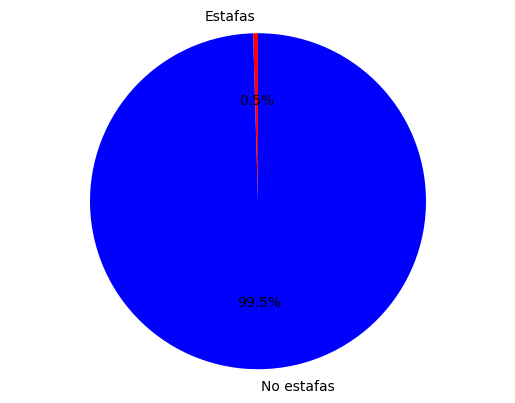

In [ ]:
lista=['Estafas','No estafas']
valores=[]
sonFraudes=test[test['is_fraud']==1]
valores.append(sonFraudes.shape[0])
NoSonFraudes=test[test['is_fraud']==0]
valores.append(NoSonFraudes.shape[0])
colores=['#FF0000','#0000FF']
plt.pie(valores, labels=lista,autopct='%1.1f%%', colors=colores, startangle=90)
plt.axis('equal')
plt.show()


**-Fraudes por fecha de nacimie

En este caso tomamos en cuenta las fechas de nacimiento de las personas que sufrieron un fraude. En el dataset se encuentra la fecha exacta de nacimiento pero para nuestra investigacion solo nos interesa el año para poder estimar la edad de la persona.

Como se puede observar hay años que se repiten mas que otros, pero mas destacable es, que se repiten años donde las personas se podrian considerar mayores de edad. Esto es un valor a tomar en cuenta, ya que tiene sentido que los adultos mayores sean mas susceptibles a este tipo de estafas ya sea por desconocimiento del funcionamiento de las tarjetas o descuidos debidos a la edad.

<ipython-input-12-b7c08db91046>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



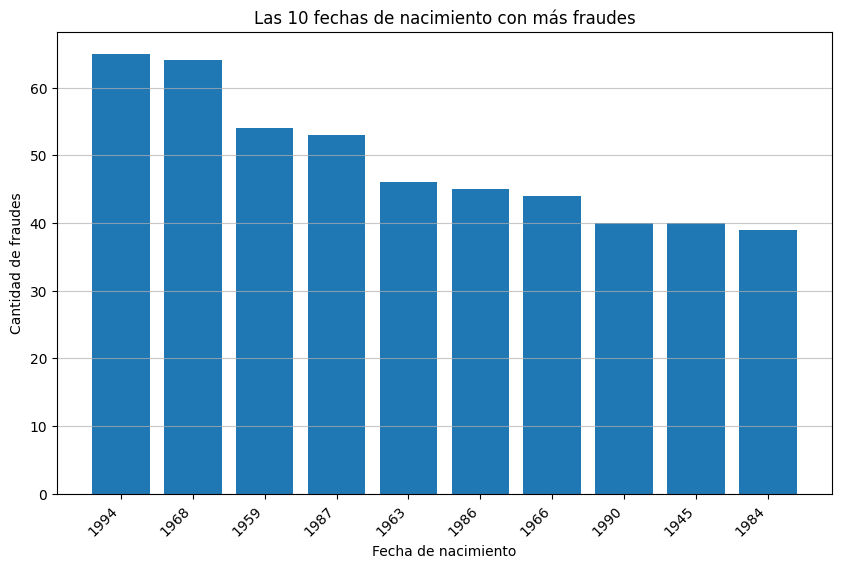

In [ ]:

test = test.dropna(subset=['dob'])

test['date'] = test['dob'].str.split('/').str[2].astype(int)

fraud_counts = test[test['is_fraud'] == 1]['date'].value_counts()

top_10_birthdates = fraud_counts.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_birthdates.index.astype(str), top_10_birthdates.values)

plt.title('Las 10 fechas de nacimiento con más fraudes')
plt.xlabel('Fecha de nacimiento')
plt.ylabel('Cantidad de fraudes')
plt.grid(axis='y', alpha=0.7)
plt.xticks(rotation=45,ha='right')
plt.show()

**- Estafas por género** *(Hecho por Sivert)*

Aqui lo que se quiso investigar es si el genero de las personas es un factor a destacar en si estas son estafadas o no.

De este grafico podemos extraer que si bien hay mas mujeres que hombres en el grupo de estafados, este factor por si solo no es algo relevante para saber si es mas probable que sea estafado/a o no. Para que este factor tome mas relevancia se deberia tomar en cuenta junto a muchos valores mas y ver si existe una correlacion entre ellos

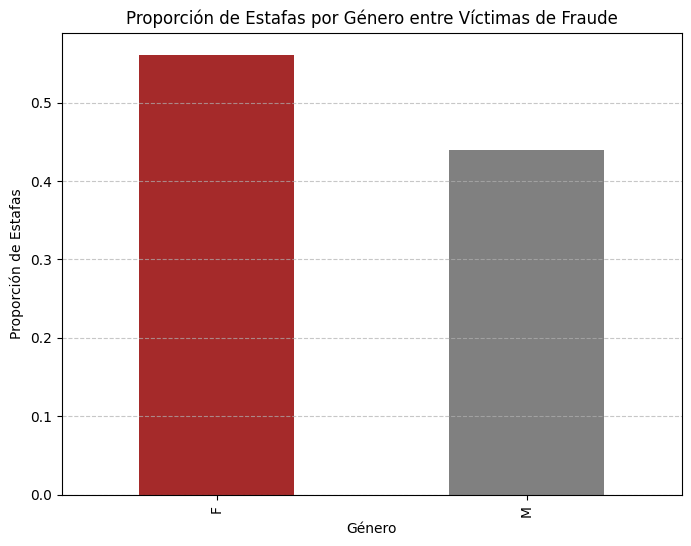

In [ ]:
fraudulent_data = test[test['is_fraud'] == 1]
fraud_gender_counts = fraudulent_data['gender'].value_counts()
fraud_prop = fraud_gender_counts / fraudulent_data.shape[0]

# Mostrar el gráfico
plt.figure(figsize=(8, 6))
fraud_prop.plot(kind='bar', color=['brown', 'gray'])
plt.title('Proporción de Estafas por Género entre Víctimas de Fraude')
plt.xlabel('Género')
plt.ylabel('Proporción de Estafas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Asimismo, veremos qué proporción de transacciones fueron fraudes, dependiendo si estas fueron efectuadas por mujeres o por hombres. *(Hecho por Hugo)*

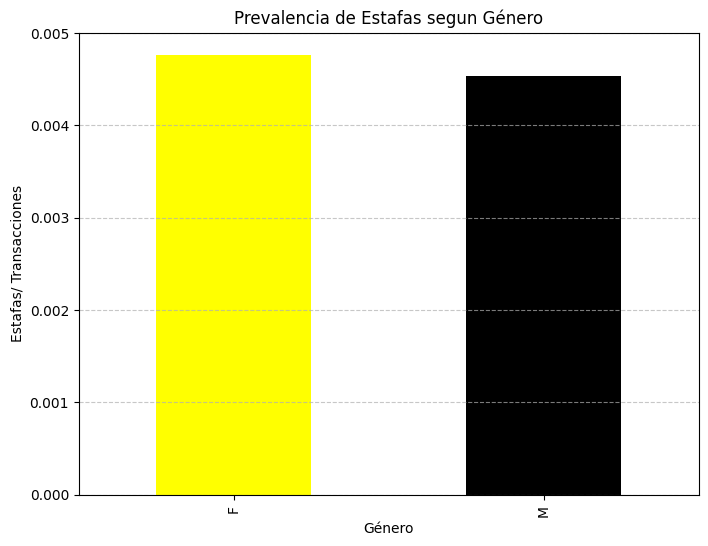

In [ ]:
fraudulent_data = test[test['is_fraud'] == 1]
fraud_gender_counts = fraudulent_data['gender'].value_counts()
gender_counts = test['gender'].value_counts()


fraud_prevalence = fraud_gender_counts / gender_counts

plt.figure(figsize=(8, 6))
fraud_prevalence.plot(kind='bar', color=['yellow', 'black'])
plt.title('Prevalencia de Estafas segun Género')
plt.xlabel('Género')
plt.ylabel('Estafas/ Transacciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**- Estafas segun ciudad** *(Hecho por Sivert)*

En este caso, se tomaron en cuenta las ciudades de las personas estafadas para ver si existe una relacion entre estas ultimas.

De aqui podemos extraer que hay ciudades que claramente tienen mayor numero de estafas que otras, que si bien puede ser un caso en que en la toma de datos tuvo mas personas de estas ciudades o estas ciudades al tener mas habitantes es mas probable que haya una estafa, ya sea por simple probabilidad o por el trafico de datos, se puede tener como un valor a considerar y que puede ser utilizado a la hora de si unas personas son mas probables a ser estafadas al vivir en ciertas ciudades.

<ipython-input-15-a2de79f86fda>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




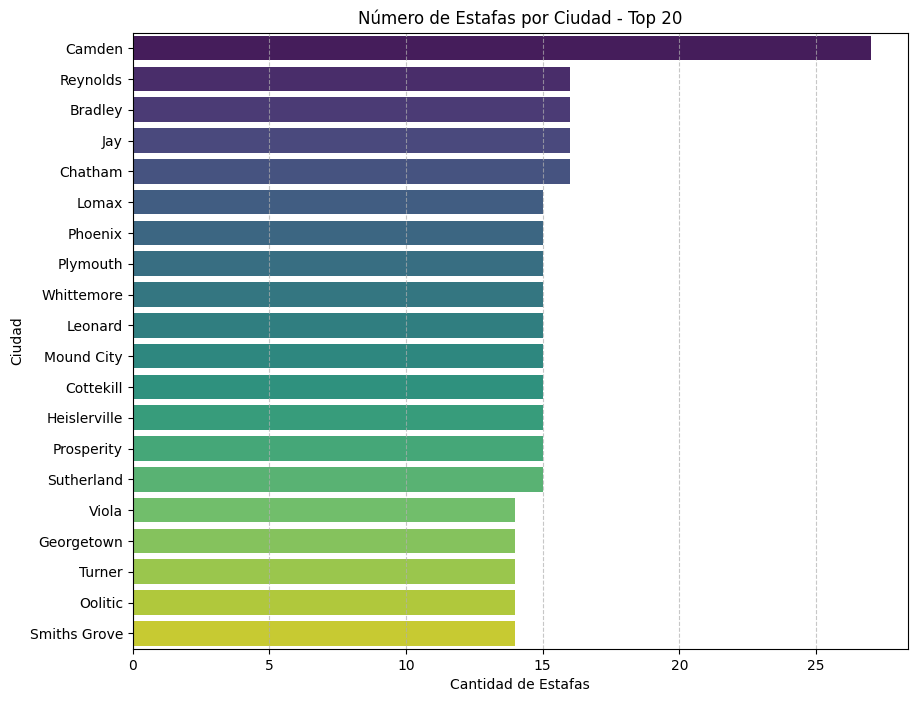

In [ ]:
fraudulent_data = test[test['is_fraud'] == 1]
fraud_city_counts = fraudulent_data['city'].value_counts()
top_cities = fraud_city_counts.head(20)

# Mostrar el gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Número de Estafas por Ciudad - Top 20')
plt.xlabel('Cantidad de Estafas')
plt.ylabel('Ciudad')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

*(Hecho por Sivert)*

En este caso se estudiaron los estados de manera similar a las ciudades.

Claramente hay estados con mayor numero de estafas que otros, pero al igual que las ciudades las razones de esto pueden ser que el muestreo tomo en cuenta a mas personas de este estado, o que en estos estados al haber mayor poblacion por simple probabilidad hay mas gente que puede ser estafada o gente que puede estafar a otros.

Sea cual sea el caso, este dato es interesante de tomar en cuenta pues si es relevante que una persona al vivir en un estado sea mas probable que pueda ser estafada al haber mas poblacion, por lo tanto mayor trafico de datos y tambien mas personas que busquen estafar.

<ipython-input-16-ef9ac9ad5dc7>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




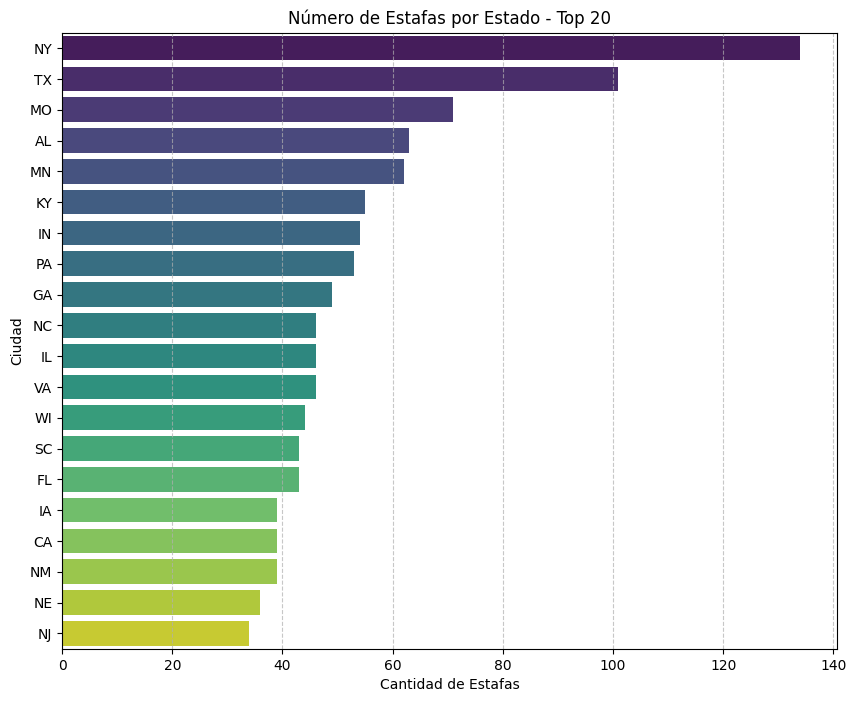

In [ ]:
fraudulent_data = test[test['is_fraud'] == 1]
fraud_city_counts = fraudulent_data['state'].value_counts()
top_cities = fraud_city_counts.head(20)

# Mostrar el gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Número de Estafas por Estado - Top 20')
plt.xlabel('Cantidad de Estafas')
plt.ylabel('Ciudad')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

*(Hecho por Sivert)*


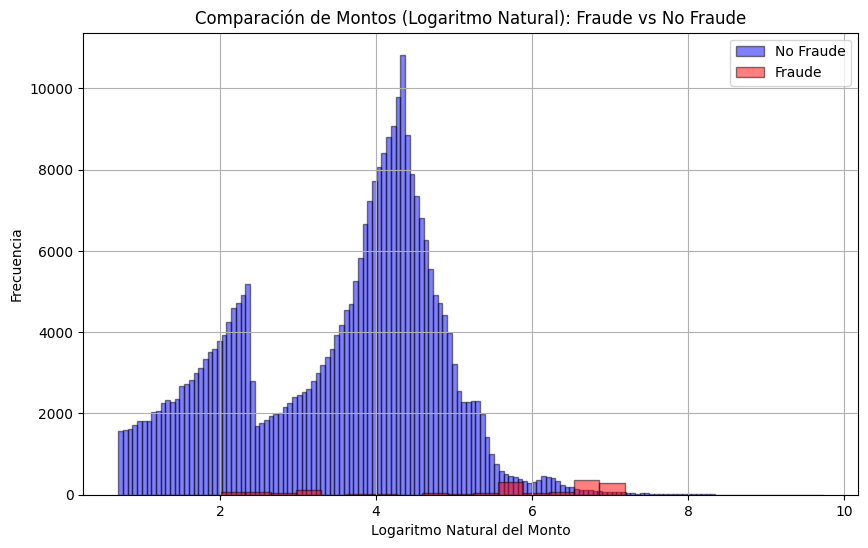

In [ ]:
non_fraud_amounts = test[test['is_fraud'] == 0]['amt']
fraud_amounts = test[test['is_fraud'] == 1]['amt']


non_fraud_amounts_log = np.log(non_fraud_amounts + 1)  # Sumamos 1 para evitar el log de cero
fraud_amounts_log = np.log(fraud_amounts + 1)

# Crear el histograma con bins automáticos
plt.figure(figsize=(10, 6))
plt.hist(non_fraud_amounts_log, bins='auto', alpha=0.5, label='No Fraude', color='blue', edgecolor='black')
plt.hist(fraud_amounts_log, bins='auto', alpha=0.5, label='Fraude', color='red', edgecolor='black')
plt.xlabel('Logaritmo Natural del Monto')
plt.ylabel('Frecuencia')
plt.title('Comparación de Montos (Logaritmo Natural): Fraude vs No Fraude')
plt.legend()
plt.grid(True)
plt.show()

*(Hecho por Hugo)*

In [ ]:
# Separar los montos por tipo de transacción
non_fraud_amounts = test[test['is_fraud'] == 0]['amt']
fraud_amounts = test[test['is_fraud'] == 1]['amt']

# Calcular estadísticas para no estafados
non_fraud_mean = non_fraud_amounts.mean()
non_fraud_median = non_fraud_amounts.median()
non_fraud_mode = non_fraud_amounts.mode().iloc[0] if not non_fraud_amounts.mode().empty else None
non_fraud_variance = non_fraud_amounts.var()
non_fraud_std_dev = non_fraud_amounts.std()

# Calcular estadísticas para estafados
fraud_mean = fraud_amounts.mean()
fraud_median = fraud_amounts.median()
fraud_mode = fraud_amounts.mode().iloc[0] if not fraud_amounts.mode().empty else None
fraud_variance = fraud_amounts.var()
fraud_std_dev = fraud_amounts.std()

# Imprimir resultados
print("No Fraude:")
print(f"Media: {non_fraud_mean}")
print(f"Mediana: {non_fraud_median}")
print(f"Moda: {non_fraud_mode if non_fraud_mode is not None else 'No moda'}")
print(f"Varianza: {non_fraud_variance}")
print(f"Desviación Estándar: {non_fraud_std_dev}\n")

print("Fraude:")
print(f"Media: {fraud_mean}")
print(f"Mediana: {fraud_median}")
print(f"Moda: {fraud_mode if fraud_mode is not None else 'No moda'}")
print(f"Varianza: {fraud_variance}")
print(f"Desviación Estándar: {fraud_std_dev}")

No Fraude:
Media: 67.46074472784693
Mediana: 47.13
Moda: 1.18
Varianza: 20869.752071724626
Desviación Estándar: 144.46367042175214

Fraude:
Media: 524.0385676037483
Mediana: 370.68
Moda: 7.23
Varianza: 154844.38024643983
Desviación Estándar: 393.50270678413364


**Estafas según dia de la semana:**
Se hizo un preprocesamiento para extraer aquellos días de la semana en los que ocurren mas estafas concluyendose que el día de la semana en el que ocurren mas fraudes es el domingo.

<ipython-input-19-a8a2ed13d369>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-a8a2ed13d369>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-a8a2ed13d369>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-a8a2

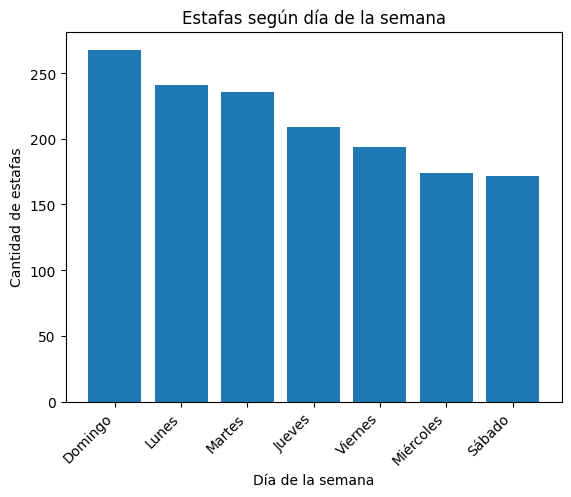

In [ ]:
import datetime
import calendar
import datetime
import calendar

def obtener_nombre_dia(dia, mes, año):
    fecha = datetime.date(año, mes, dia)
    nombre_dia = calendar.day_name[fecha.weekday()]
    if nombre_dia=="Monday":
        nombre_dia="Lunes"
    elif nombre_dia=="Tuesday":
        nombre_dia="Martes"
    elif nombre_dia== "Wednesday":
        nombre_dia="Miércoles"
    elif nombre_dia=="Thursday":
        nombre_dia="Jueves"
    elif nombre_dia=="Friday":
        nombre_dia="Viernes"
    elif nombre_dia== "Saturday":
        nombre_dia="Sábado"
    elif nombre_dia=="Sunday":
        nombre_dia="Domingo"
    return nombre_dia

estafas=test[test["is_fraud"]==1]
estafas["dia"]=test["trans_date_trans_time"].apply(lambda x:int(x[0:2]))
estafas["mes"]=test["trans_date_trans_time"].apply(lambda x:int(x[3:5]))
estafas["anho"]=test["trans_date_trans_time"].apply(lambda x:int(x[6:10]))

estafas["nombreDia"]=estafas.apply(lambda x: obtener_nombre_dia(x["dia"],x["mes"],x["anho"]),axis=1)
nombreDias=estafas["nombreDia"].value_counts().reset_index()
nombreDias
plt.bar(nombreDias['nombreDia'],nombreDias['count'])
plt.ylabel('Cantidad de estafas')
plt.xlabel('Día de la semana')
plt.title("Estafas por dia de la semana")
plt.xticks(rotation=45,ha='right')
plt.title('Estafas según día de la semana')
plt.show()
plt.close()

**Estafas según mes del año:**
En el gráfico de abajo se visualizan aquellos meses del año en los que ocurren mas estafas concluyendose que el mes del año en el que se concretan mas fraudes es Agosto.

<ipython-input-20-07c347f1557b>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



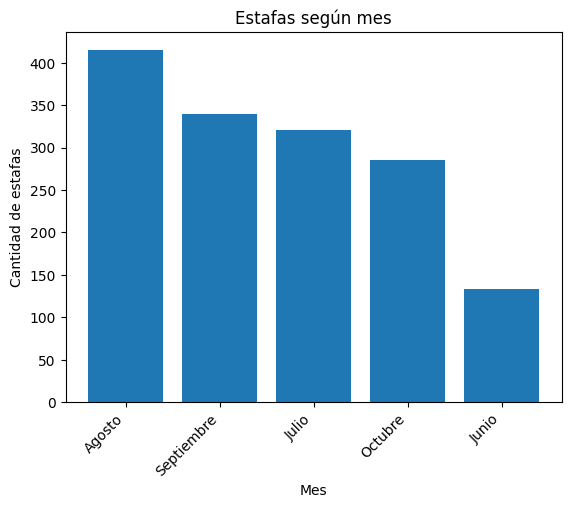

In [ ]:
def mes(fecha):
  if fecha[3:5]=="01":
    return "Enero"
  elif fecha[3:5]=="02":
    return "Febrero"
  elif fecha[3:5]=="03":
    return "Marzo"
  elif fecha[3:5]=="04":
    return "Abril"
  elif fecha[3:5]=="05":
    return "Mayo"
  elif fecha[3:5]=="06":
    return "Junio"
  elif fecha[3:5]=="07":
    return "Julio"
  elif fecha[3:5]=="08":
    return "Agosto"
  elif fecha[3:5]=="09":
    return "Septiembre"
  elif fecha[3:5]=="10":
    return "Octubre"
  elif fecha[3:5]=="11":
    return "Noviembre"
  elif fecha[3:5]=="12":
    return "Diciembre"

solofraudes=test[test['is_fraud']==1.0]
solofraudes["mes"]=solofraudes["trans_date_trans_time"].apply(lambda x:mes(x))
tabla=solofraudes["mes"].value_counts().reset_index()
plt.bar(tabla['mes'],tabla['count'])
plt.xlabel('Mes')
plt.ylabel('Cantidad de estafas')
plt.title('Estafas según mes')
plt.xticks(rotation=45,ha='right')
plt.show()
plt.close()

# Preguntas y Problemas *(Hecho por Diego)*

Dado el análisis exploratorio de los datos, es posible reconocer que existen características de las transacciones que tienen mayor incidencia en casos fraudulentos. Por ende, se plantean las siguientes preguntas a ser resueltas usando metodologías de minería de datos:

- ¿Podemos predecir con los datos que tenemos cuándo ocurre un fraude de tarjeta de credito, usando Clasificación Binaria?

- En caso de que una clasificación binaria sea demasiado restrictiva, ¿es posible extrapolar los datos y calcular la probabilidad de que una transacción sea fraudulenta?

- ¿Hay caracteristicas que resalten sobre las demás a la hora de que ocurra un fraude?

- ¿Es posible establecer grupos de riesgo en sufrir transacciones fradulentas? ¿Existen relaciones entre estos?

# Hito 2

In [ ]:
#Sacado del tutorial 3
def graficar(y_test,y_pred,name=''):
  cm = confusion_matrix(y_test, y_pred) # calcula valores de la matriz de confusión

  fig, ax = plt.subplots()

  ax = sns.heatmap(cm, annot=True, cmap="viridis") # transforma la matriz en un heatmap para su visualización
  if name != '':
    ax.set_title('Confusion Matrix: '+ name +'\n')
  else:
    ax.set_title('Confusion Matrix\n')
  ax.set_xlabel('Predicted label')
  ax.set_ylabel('True label')

  plt.show()
  plt.close()

## ¿Podemos predecir con los datos que tenemos cuándo ocurre un fraude de tarjeta de credito, usando Clasificación Binaria?

*(Hecho por Franco, Revisado por Hugo)*

Esta primera pregunta plantea, primero que todo, dado que el dataset posee gran cantidad de datos nominales y la variable objetivo es binaria (es fraude -> (1, 0)), como primer modelo para la predicción de fraudes bancarios sería lógico entrenar un modelo de clasificación binaria.

Para este caso, se preprocesa el dataframe de la siguiente manera: se agregan las columnas _dia, mes, año, hora y año del nacimiento del titular_ y se quitan las columnas _trans_date_trans_time, dob, cc_num, merchant, first, last, Street, city, state, zip, lat, long, trans_num, merch_lat, merch_long, unix_time y Unnamed: 0._. Esto es así ya que para poder entrenar el modelo se necesitará separar el atributo _rans_date_trans_time_ en _día, mes, año y hora_. En cuanto a _dob_, sólo se va a obtener el año de nacimiento, dado que se considera que es irrelevante obtener el mes y el día. Los otros atributos que se quitan también son considerados irrelevantes. Con lo anterior, se reducen las dimensiones con las que tendrá que trabajar en el modelo y se espera que se mejore el rendimiento para predecir los fraudes.

Se elige la mejor opción de clasificación binaria comparando los modelos _árbol de decisión, naive bayes, k nearest neigbors, support vector machines y random forest_. Para verificar cuál de estos modelos es el mejor se ocuparán las métricas _precisión, recall y f-score_ Se preferirá que los modelos tengan un mayor valor en precisión puesto que se considera más importante enfocarse en los errores de tipo I. En caso de no encontrar casos significativos, entonces se quitarán las columnas menos relevantes para reducir aún más la dimensionalidad con tal de ver si los resultados mejoran.




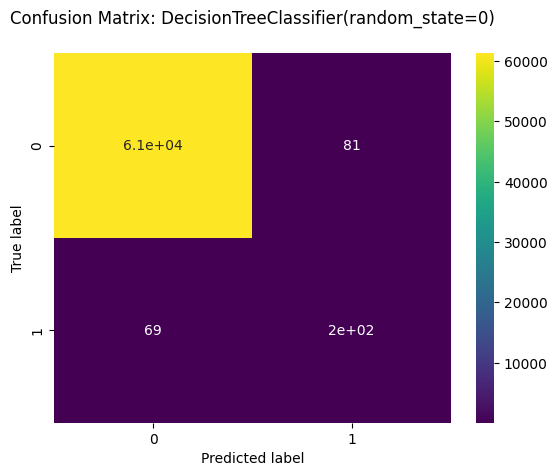

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61414
         1.0       0.71      0.74      0.72       264

    accuracy                           1.00     61678
   macro avg       0.85      0.87      0.86     61678
weighted avg       1.00      1.00      1.00     61678



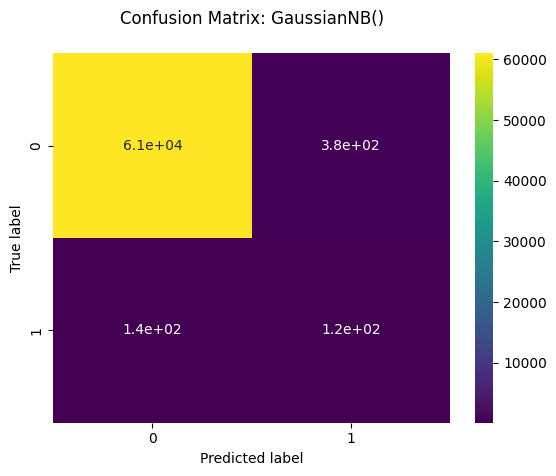

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     61414
         1.0       0.25      0.47      0.32       264

    accuracy                           0.99     61678
   macro avg       0.62      0.73      0.66     61678
weighted avg       0.99      0.99      0.99     61678



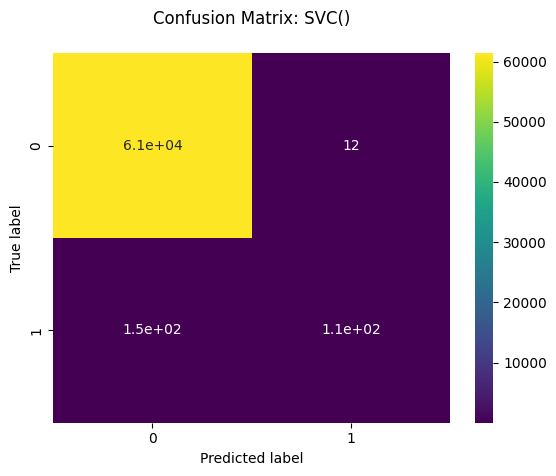

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61414
         1.0       0.90      0.43      0.58       264

    accuracy                           1.00     61678
   macro avg       0.95      0.71      0.79     61678
weighted avg       1.00      1.00      1.00     61678



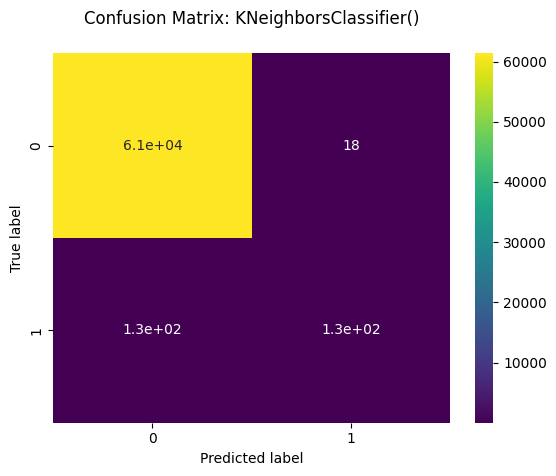

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61414
         1.0       0.88      0.50      0.64       264

    accuracy                           1.00     61678
   macro avg       0.94      0.75      0.82     61678
weighted avg       1.00      1.00      1.00     61678



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

test = pd.read_csv("fraud test.csv", sep= ",",on_bad_lines='skip')

#preprocesamiento

nuevo=test.drop(["cc_num","merchant","first","last","street","city","state", "zip", "lat","long", "trans_num","merch_lat","merch_long","unix_time","Unnamed: 0"],axis=1)
nuevo=nuevo.drop(nuevo.index[-1])
nuevo["dia"]=nuevo["trans_date_trans_time"].apply(lambda x:x[0:2])
nuevo["mes"]=nuevo["trans_date_trans_time"].apply(lambda x:int(x[3:5]))
nuevo["anho"]=nuevo["trans_date_trans_time"].apply(lambda x:x[6:10])
nuevo["hora"]=nuevo["trans_date_trans_time"].apply(lambda x:x[11:13])
nuevo["anhoNacimientoTitular"]=nuevo["dob"].apply(lambda x:x[6:10])
nuevo=nuevo.drop(columns=["trans_date_trans_time","dob"])

diccionario = {}
def transformar_Categoricas_Numericas(dataframe):
  for column in nuevo.select_dtypes(include=['object']).columns:
      le = LabelEncoder()
      dataframe[column] = le.fit_transform(dataframe[column])
      diccionario[column] = dict(zip(le.classes_, le.transform(le.classes_)))

scaler=StandardScaler()

X=nuevo.drop(["is_fraud"],axis=1)
transformar_Categoricas_Numericas(X)
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y=nuevo["is_fraud"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=37,stratify=y)
clf_dtc=DecisionTreeClassifier(criterion="gini", random_state=0)
clf_nb=GaussianNB()
clf_svc=SVC()
clf_knn=KNeighborsClassifier()
clasificadores= [clf_dtc,clf_nb,clf_svc,clf_knn]
for i in range(0,4):
  clasificador=clasificadores[i]
  clasificador.fit(X_train,y_train)
  y_pred = clasificador.predict(X_test)
  graficar(y_test,y_pred,str(clasificador))
  print(classification_report(y_test, y_pred))

Con los experimentos hechos anteriormente se extrae que el modelo que da una mayor cantidad de predicciones de fraudes correctamente predichos es SVC.  En tanto, el modelo que da una mayor proporción de fraudes correctamente predichos por sobre el total de fraudes reales es el arbol de decisión.  Por otro lado, el modelo que dio el resultado mas favorable en f1-score fue nuevamente el arbol de decisión.   Considerando que nos interesa predecir los fraudes entonces el modelo SVC resultaría ser el mas indicado para ser ocupado.  
Se concluye que si es posible ocupar clasificación binaria para generar modelos que logren predecir fraudes.

## ¿Es posible extrapolar los datos y calcular la probabilidad de que una transacción sea fraudulenta?

*(Hecho por Franco, revisado por Branko)*

El problema de esta pregunta recae en encontrar un modelo de regresión que permita calcular la probabilidad de la variable binaria "is_fraud", maximizando los mismos parámetros de evaluación que se priorizaron en la pregunta 1. Se quiere también estudiar si un enfoque probabilístico es mejor que un enfoque de clasificación binaria para estudiar el problema general de este trabajo, a la hora de predecir si una transacción bancaria corresponde a fraude o no.

Se elige usar regresión logística ya que una interpretación probabilística para la variable binaria resulta adecuada para el problema, a parte de dar un resultado con más matices que el de una clasificación binaria; en particular, el poder tener la información de qué tan probable es una transacción de ser estafa permite establecer en la práctica un umbral bajo el cual se debe dejar pasar una transacción como legítima, clasificarla como dudosa, o directamente bloquearla, en caso de que la probabilidad de que sea estafa es muy alta. Esto correspondería más a la _interpretación_ del modelo más que a la implementación de este. La idea es que esta clasificación a posteriori sólo se puede hacer con la información extra que provee la regresión logística por sobre un modelo de clasificación binaria.

Para hacer la regresión, se preprocesan los datos de manera idéntica a la pregunta 1: se agregan las columnas _dia, mes, año, hora  y año del nacimiento del titular_ y se quitan las columnas _trans_date_trans_time, dob, cc_num, merchant, first, last, Street, city, state, zip, lat, long, trans_num, merch_lat, merch_long, unix_time y Unnamed: 0_. Por las misma razones descritas en la pregunta 1. Por último, para que funcione la regresión logística (que es en el fondo una regresión lineal), se discretizan los valores no-numéricos (_category, gender y job_).

Se entrenará el modelo usando regresión logística y se evaluará su exactitud usando dos métodos:
- Usando el modelo para predecir valores usando un _soft-classifier_, obteniendo una matriz de confusión.
  - En particular, se tendrá mayor atención a la métrica de Recall. Es decir, se quiere minimizar la cantidad de fraudes que no son detectados. Esto se debe, en parte, al gran inbalance de clases: existen muchos menos fraudes que transacciones legítimas en el dataset.
  - Respecto al _soft-classifier_, la idea es probar el modelo con distintos umbrales de probabilidad, es decir, usando un ROC.
- Por último, dado que la regresión logística deriva de la regresión lineal, existen distintos valores análogos a R^2 para evaluar su desempeño. Dado que existen una multitud de estos pseudo R^2, se evaluará a futuro cuál de estas métricas puede ser útil para la validación del modelo.

En caso de que el desempeño del modelo no sea satisfactorio, se reducirá la dimensionalidad del dataframe. En caso de que ninguna combinación resulte satisfactoria, se puede concluir que alguno de los supuestos de la regresión logística no se cumple.

In [ ]:
#Esta parte es común para todos los experimentos. Se limpia el dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import numpy as np
from sklearn.model_selection import train_test_split

pio.renderers.default = 'notebook'
pd.set_option('display.max_columns', None)


test = pd.read_csv("fraud test.csv", sep= ",",on_bad_lines='skip')

X = test.drop(["cc_num","merchant","first","last","street","city","state", "zip", "lat","long", "trans_num","merch_lat","merch_long","unix_time","Unnamed: 0"],axis=1) #se ignoran valores irrelevantes
X = X.drop(X.index[-1])
X["dia"] = X["trans_date_trans_time"].apply(lambda x:x[0:2])
X["mes"] = X["trans_date_trans_time"].apply(lambda x:int(x[3:5]))
X["anho"] = X["trans_date_trans_time"].apply(lambda x:x[6:10])
X["hora"] = X["trans_date_trans_time"].apply(lambda x:x[11:13])
X["anhoNacimientoTitular"] = X["dob"].apply(lambda x:x[6:10])
X = X.drop(columns=["trans_date_trans_time","dob"])

X['anhoNacimientoTitular'] = X['anhoNacimientoTitular'].astype(int) #se cambia el tipo del año de nacimiento a int
X['dia'] = X['dia'].astype(int) #se cambia el tipo del año de nacimiento a int
X['anho'] = X['anho'].astype(int) #se cambia el tipo del año de nacimiento a int
X['hora'] = X['hora'].astype(int) #se cambia el tipo del año de nacimiento a int

X = pd.get_dummies(X, columns = ['category', 'gender', 'job']) #se convierten los valores categoricos en bools

y = X['is_fraud'] #Y la variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

#Los datos se escalan y estandarizan
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

#Aquí es donde se entrena el modelo.
# C = inverso de la regularizacion. Mientras más grande sea el valor, más se regulariza el modelo. Se usa un valor alto a priori.
# solver = se escoge el solver por defecto "liblinear". Si bien la documentación de Scikit-learn indica que existen mejores solvers para datasets grandes, se verá en a continuación que el desempeño de liblinear es suficiente
# class_weight = esta es una variable que permite compensar en el entrenamiento para un dataset desbalanceado. En particular, 'balanced' hace que en el entrenamiento se ajusten automáticamente los pesos
# en proporción de su frecuencia. Esta opción es muy importante, ya que el dataset usado presenta un gran desbalance respecto a la variable objetivo is_fraud

logreg = LogisticRegression(C = 1000.0, solver = "liblinear", class_weight='balanced', random_state = 2)
logreg.fit(X_train_std, y_train)
y_pred = logreg.predict(X_test_std)
print(logreg.score(X_test_std, y_test))

1.0


A continuación, se presenta la matriz de confusión para la partición generada anteriormente.

Se logra apreciar una matriz prácticamente perfecta, donde se califican correctamente todos los datos.

Para confirmar que esto no se debe a una partición conveniente, se usa _Cross Validation_ para evaluar el modelo, particular en las métricas que interesan al problema principal.

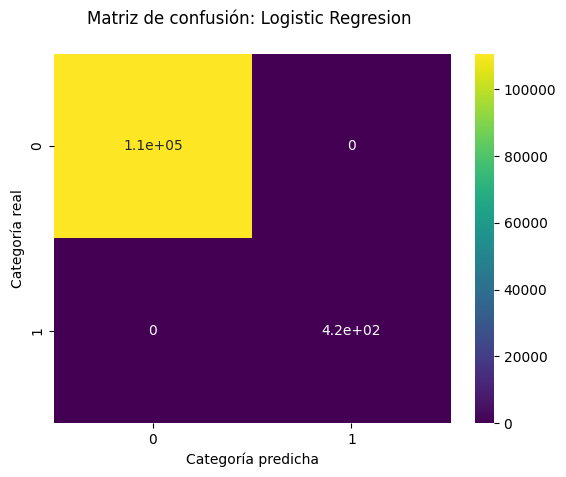

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) # calcula valores de la matriz de confusión

fig, ax = plt.subplots()

ax = sns.heatmap(cm, annot=True, cmap="viridis") # transforma la matriz en un heatmap para su visualización

ax.set_title('Matriz de confusión: Logistic Regresion \n')
ax.set_xlabel('Categoría predicha')
ax.set_ylabel('Categoría real')

plt.show()

### Curva ROC
*(Hecho por Franco y revisado por Diego)*

Como se mencionó anteriormente, la regresión logística calcula  la *probabilidad* de que un dato pertenezca a cierta clase. Luego el proceso de asignación se hace con un umbral; es decir, el valor que $ P(x) $ debe superar para que se clasifique como $True$ en una variable binaria, done $x$ es un dato.

La curva ROC permite visualizar el desempeño de la regresión logística en función del valor del umbral $Θ$, donde la curva gris corresponde al desempeño de un clasificador aleatorio, y la curva naranja de un clasificador perfecto.

Se grafica con azul la curva de la regresión logística que se entrenó anteriormente.

Luego, se puede calcular el área bajo la curva $AUC$, donde un valor = 1 corresponde a un clasificador perfecto

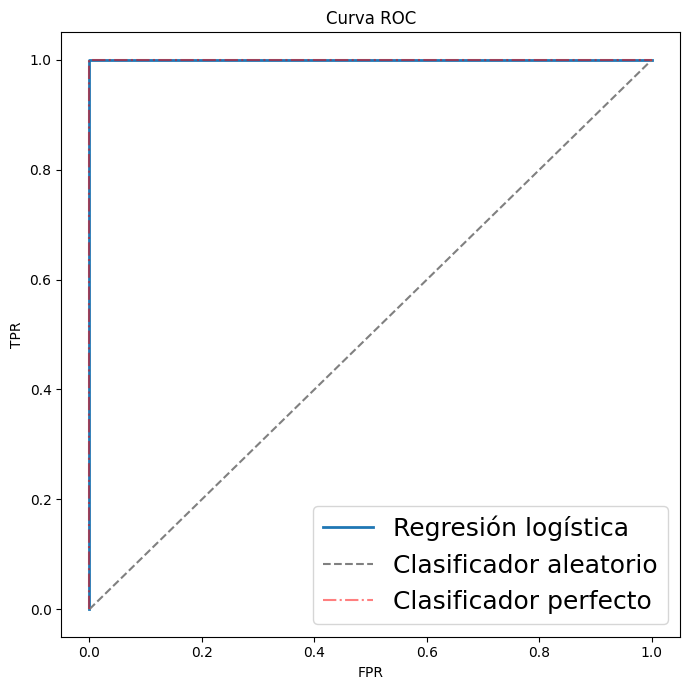

AUC: 1.00


In [ ]:
#ROC CURVE

from sklearn.metrics import roc_curve, auc

fig = plt.figure(figsize=(7,7))

# mean_tpr = 0.0
# mean_fpr = np.linspace(0, 1, 100)
# all_tpr = []

probas = logreg.predict_proba(X_test_std)

## we use feature 1 as positive label
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 0], pos_label=0)

plt.plot(fpr, tpr, lw=2, label='Regresión logística')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color='gray',
         label='Clasificador aleatorio')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle='-.',
         alpha=0.5,
         color='red',
         label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.tight_layout()
plt.legend(loc=4, prop={'size': 18})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

print('AUC: %.2f' % auc(fpr, tpr))

Para confirmar el desempeño de la regresión logística, se usa validación cruzada para evaluar el clasificador en particiones aún no vistas por el modelo.

In [ ]:
# Cross Validation

from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(logreg, X, y, cv=10, scoring=scoring)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:   ', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score: ', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary: ', np.mean(cv_results['test_accuracy']))

Promedio Precision: 0.998851087325858
Promedio Recall:    0.9999954838593134
Promedio F1-score:  0.999418769616604
Promedio Accucary:  0.999991002533686


Donde es posible apreciar que las cuatro métricas corresponden a valores sobresalientes.

A partir de esto se puede confirmar que calcular la probabilidad de estafa es un modelo altamente adecuado para el problema. Si bien es prudente sospechar de cierto riesgo de _Overfitting_, gracias a que la regresión logística entrega una probabilidad de la clase correspondiente, este método es ideal para aplicarlo en casos reales, donde si bien herramientas de minería de datos permiten extraer información de manera automática, poder obtener información más matizada sobre la cual dependen otros sistemas u toma de decisiones (por ejemplo, un sistema que bloquea automáticamente una transacción si su probabilidad de ser fraudulenta es mayor al 80%) y además interpretable es una gran ventaja por sobre otros modelos de predicción.

En cuanto a consideración a futuro, un paso importante para mejorar significativamente los resultados de la regresión logística fue el balance de los pesos: cuando se asumen las clases como balanceadas, los resultados eran equivalentes a los de un clasificador aleatorio, incluso con solvers más especializados como _sag_. La posibilidad de que se balanceen automáticamente los pesos de la regresión para compensar un dataset imbalanceado es una función muy útil que considerar a futuro.

### Fuentes:
Tutoriales para Regresión logística con scikit-learn:
- https://www.machinelearningnuggets.com/logistic-regression/

- https://nthu-datalab.github.io/ml/labs/06_Logistic-Regression_Metrics/06_Logistic-Regression_Metrics.html

Explicación de curva ROC:
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

Documentación de LogisticRegresion en scikit-learn:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Regresión logística para datasets imbalanceados:
- https://www.geeksforgeeks.org/weighted-logistic-regression-for-imbalanced-dataset/

## ¿Hay caracteristicas que resalten sobre las demás a la hora de que ocurra un fraude? *(Hecho por Franco)*


Para responder a esta pregunta se ocupará el modelo entrenado de arboles de decisión.  La idea es crear un dataframe a partir de los resultados del modelo que tenga las características junto con su importancia relativa dentro de la toma de decisiones para luego graficar estas dos columnas y visualizar con mayor claridad que parametros son considerados por el modelo como los mas importantes.
Como se puede apreciar en el gráfico, las 4 características mas relevantes según el modelo son la categoría, el monto, la hora y el año del nacimiento del titular.

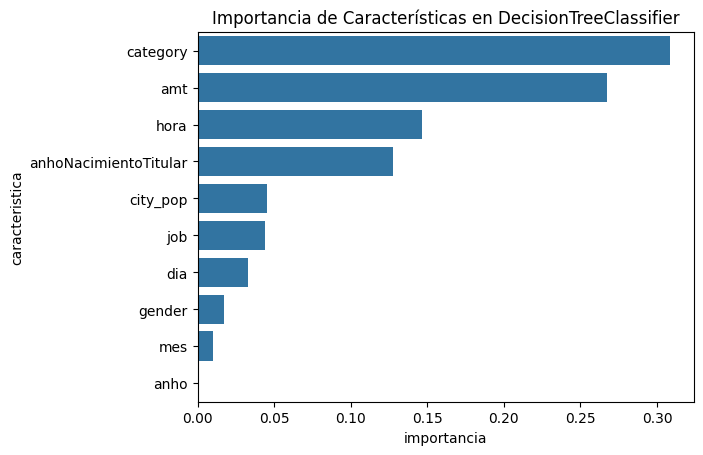

In [ ]:
importancia=clf_dtc.feature_importances_
importancia_caracteristicas = pd.DataFrame({'caracteristica': X.columns, 'importancia': importancia})
importancia_caracteristicas = importancia_caracteristicas.sort_values('importancia', ascending=False)
sns.barplot(x='importancia', y='caracteristica', data=importancia_caracteristicas)
plt.title('Importancia de Características en DecisionTreeClassifier')
plt.show()

## ¿Es posible establecer grupos de riesgo en sufrir transacciones fradulentas? ¿Existen relaciones entre estos? *(Hecho por Danilo)*

El acercamiento inicial para este problema corresponde a utilizar Clustering sobre las transacciones bancarias bajo ciertas características. Para responder a la pregunta, se deberá estudiar si alguno de los Clúster posee una cantidad remarcablemente alta de fraudes respecto al total de objetos dentro del mismo clúster. Si se encuentra uno con una alta proporción de fraudes, se puede definir como grupo de riesgo. Antes de realizar el experimento, se manipulara la base de datos original para poder dejar los datos mas relevantes para establecer grupos de riesgo a nuestro criterio. Como se vio en el experimento anterior vimos que categoria era muy relevante a la hora de cometer fraudes, pero en este caso al utilizar clusters, nos centraremos en los datos que son numericos como pueden ser la edad de la persona que es afectada o la cantidad defraudada. Por lo que, nosotros proponemos que estos dos datos mencionados seran los mas destacados a la hora de establecer grupos de riesgo para los fraudes o ver que es lo que se puede destacar a la hora de que ocurra un fraude.

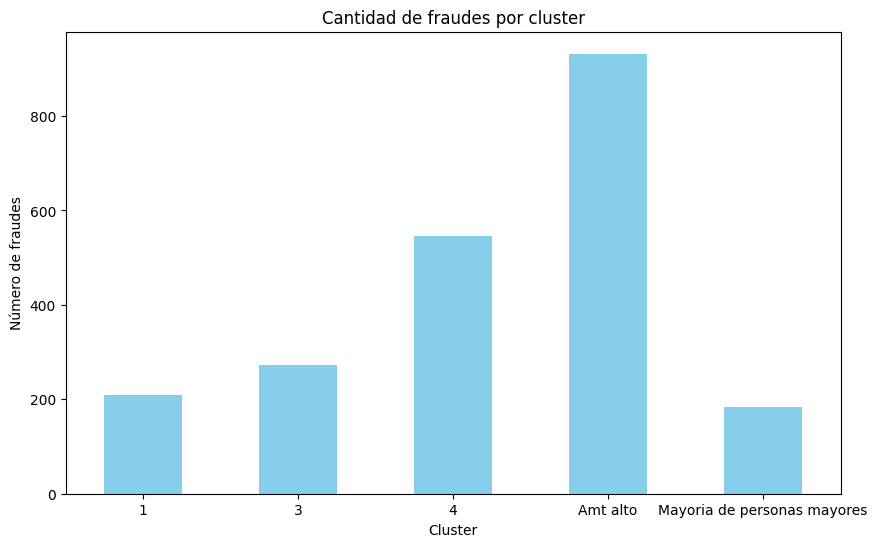

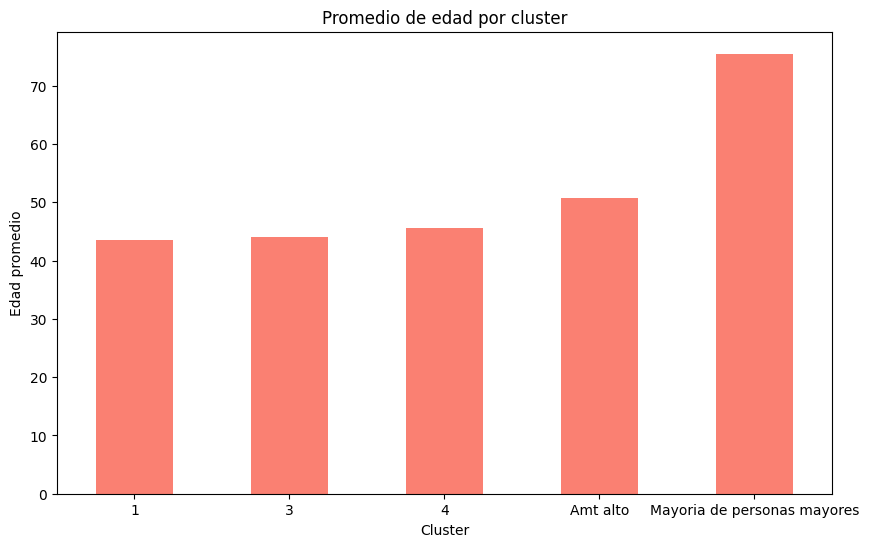

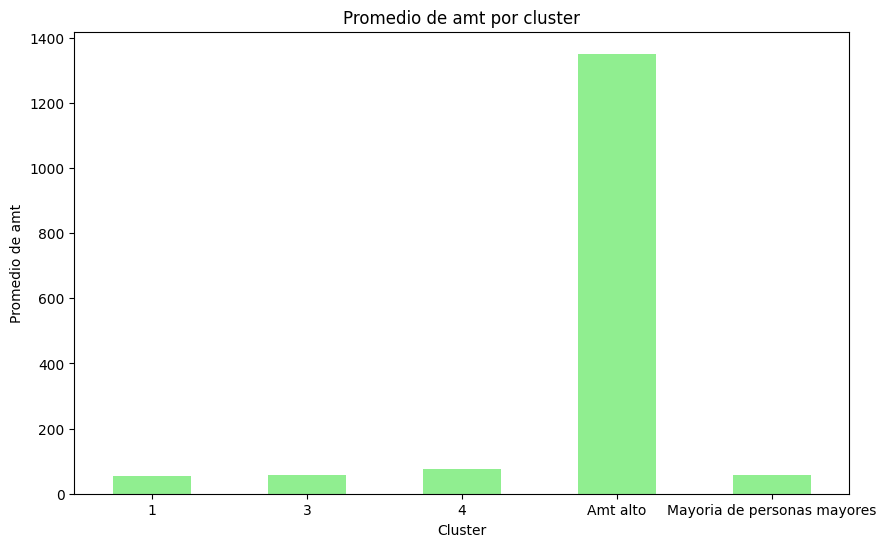

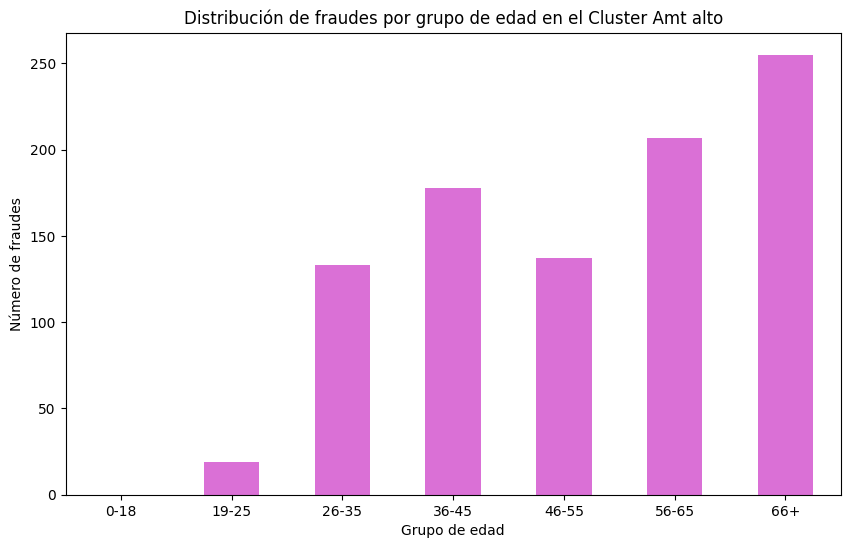

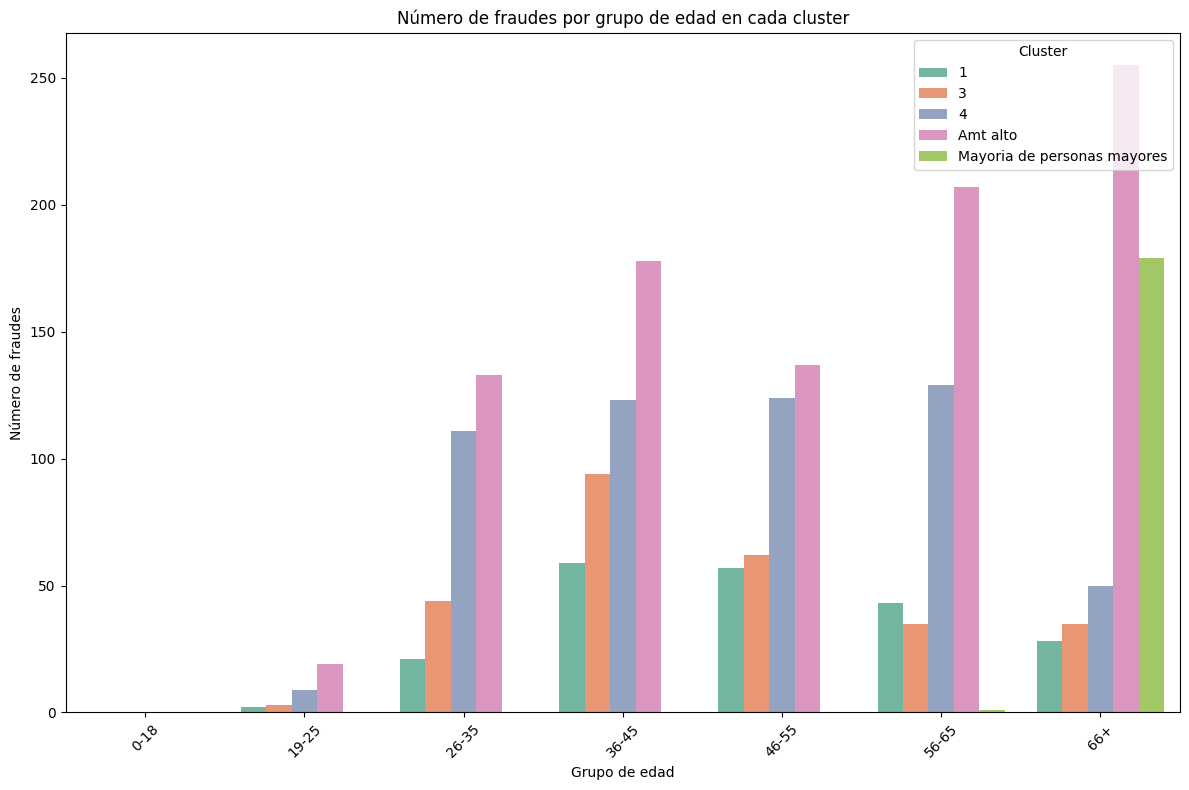

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la fecha de nacimiento a edad
test['dob'] = pd.to_datetime(test['dob'], format='%d/%m/%Y')
test['age'] = 2024 - test['dob'].dt.year

# Convertir la fecha y hora de la transacción a datetime y extraer características relevantes
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'], format='%d/%m/%Y %H:%M')
test['trans_hour'] = test['trans_date_trans_time'].dt.hour
test['trans_day'] = test['trans_date_trans_time'].dt.day
test['trans_month'] = test['trans_date_trans_time'].dt.month
test['trans_year'] = test['trans_date_trans_time'].dt.year

# Convertir variables categóricas a numéricas utilizando Label Encoding
label_encoders = {}
categorical_columns = ['merchant', 'category', 'gender', 'job']

for column in categorical_columns:
    le = LabelEncoder()
    test[column] = le.fit_transform(test[column])
    label_encoders[column] = le

# Seleccionar características relevantes para el clustering
features = ['amt', 'age', 'trans_hour', 'trans_day', 'trans_month', 'category', 'job']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(test[features])

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

df_scaled = pd.DataFrame(df_scaled, columns=features)

# Elegir el número óptimo de clusters (método del codo fue realizado y no incluido por tiempo de ejecución)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=30)
test['cluster'] = kmeans.fit_predict(df_scaled)

# Crear grupos de edad
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
test['age_group'] = pd.cut(test['age'], bins=age_bins, labels=age_labels, right=False)

# Mapeo de clusters a nombres personalizados
cluster_names = {0: 'Mayoria de personas mayores', 2: 'Amt alto'}
test['cluster_name'] = test['cluster'].map(cluster_names).fillna(test['cluster'].astype(str))

# Analizar la distribución de fraudes dentro de cada grupo de edad y dentro de cada cluster
age_fraud_distribution = test.groupby(['cluster_name', 'age_group'])['is_fraud'].value_counts(normalize=True).unstack().fillna(0)
age_fraud_counts = test.groupby(['cluster_name', 'age_group'])['is_fraud'].sum()

fraud_counts_per_cluster = test.groupby('cluster_name')['is_fraud'].sum()

# Graficar número de fraudes por cluster
plt.figure(figsize=(10, 6))
fraud_counts_per_cluster.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Número de fraudes')
plt.title('Cantidad de fraudes por cluster')
plt.xticks(rotation=0)
plt.show()

cluster_avg_age = test.groupby('cluster_name')['age'].mean()

# Graficar edad promedio por cluster
plt.figure(figsize=(10, 6))
cluster_avg_age.plot(kind='bar', color='salmon')
plt.xlabel('Cluster')
plt.ylabel('Edad promedio')
plt.title('Promedio de edad por cluster')
plt.xticks(rotation=0)
plt.show()

cluster_avg_amt = test.groupby('cluster_name')['amt'].mean()

# Graficar promedio de amt por cluster
plt.figure(figsize=(10, 6))
cluster_avg_amt.plot(kind='bar', color='lightgreen')
plt.xlabel('Cluster')
plt.ylabel('Promedio de amt')
plt.title('Promedio de amt por cluster')
plt.xticks(rotation=0)
plt.show()

cluster_max_frauds = fraud_counts_per_cluster.idxmax()

cluster_data = test[test['cluster_name'] == cluster_max_frauds]

# Calcular la distribución de fraudes por grupo de edad en el cluster seleccionado
age_fraud_counts_cluster_max = cluster_data.groupby('age_group')['is_fraud'].sum()

# Graficar la distribución de fraudes por grupo de edad en el cluster con mayor cantidad de fraudes
plt.figure(figsize=(10, 6))
age_fraud_counts_cluster_max.plot(kind='bar', color='orchid')
plt.xlabel('Grupo de edad')
plt.ylabel('Número de fraudes')
plt.title(f'Distribución de fraudes por grupo de edad en el Cluster {cluster_max_frauds}')
plt.xticks(rotation=0)
plt.show()

# Calcular la cantidad de fraudes por grupo de edad en cada cluster
age_fraud_counts_per_cluster = test.groupby(['cluster_name', 'age_group'])['is_fraud'].sum().reset_index()

# Graficar los grupos de edad con más fraudes en cada cluster
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='is_fraud', hue='cluster_name', data=age_fraud_counts_per_cluster, palette='Set2')
plt.xlabel('Grupo de edad')
plt.ylabel('Número de fraudes')
plt.title('Número de fraudes por grupo de edad en cada cluster')
plt.xticks(rotation=45)
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()


Analizando ahora los datos obtenidos, lo que mas se puede destacar claramente es el promedio de cantidad defraudada en el cluster 2 y como esto coincide con que el cluster 2 sea el que posea mayor cantidad de casos de fraude, por lo que podemos concluir de esto que la cantidad es un dato muy importante a la hora de que ocurra un fraude. Otro dato a destacar son las edades de los titulares, en este caso se dividieron en grupos de distintos rangos de edad. De esto podemos extraer que, en el cluster con mayor cantidad de fraudes se puede observar que si bien su promedio de edad no es el mas alto de todos, sigue teniendo una gran cantidad de fraudes para los rangos de 56-65 y 66 o mas, que consideraremos en este caso grupos de edad de personas mayores. Lo otro a destacar es el promedio de edad de todos los clusters, donde se puede observar que en la mayoria hay un promedio que ronda las edades mencionadas, mientras que los otros no, pero estos ultimos puede deberse a que otros datos que fueron introducidos fueron tomados en cuenta dentro del experimento y los separo de los otros clusters. Con todo esto, tambien podemos concluir que el rango de edad que va desde los 56 años hasta 66 años o mas, es un grupo de riesgo a la hora de que se cometan fraudes, y con esto comprobando lo que se planteo en un principio.

https://scikit-learn.org/stable/modules/clustering.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html